In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.12.1+cu102'

In [ ]:
bias = 0.3
weight = 0.7

start=0
end=1
step=0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

In [ ]:
X_split = int(0.8 * len(X))
X_train, Y_train = X[:X_split], Y[:X_split]
X_test, Y_test = X[X_split:], Y[X_split:]

In [ ]:
def plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=None,
):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

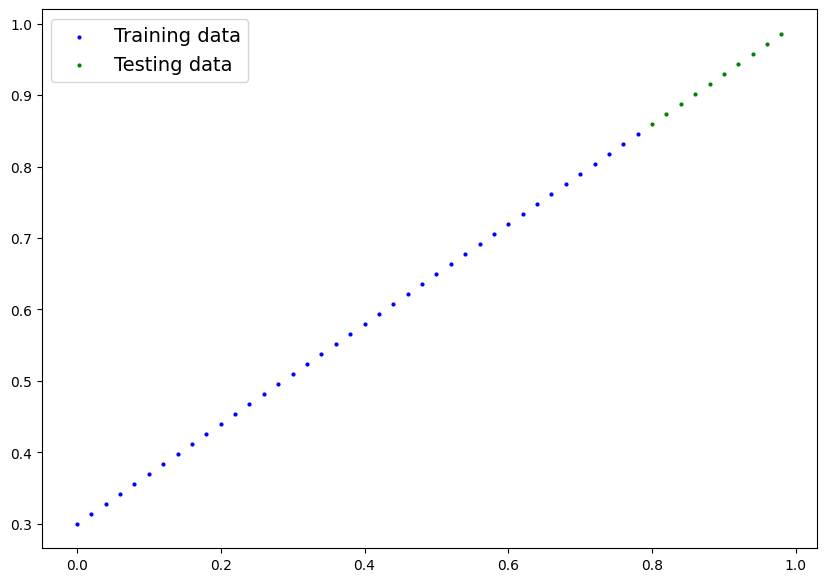

In [ ]:
#Plotting the data
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [ ]:
# Now We have to set optimizer and loss function
loss_fn = nn.L1Loss()

model_1 = LinearRegressionModel()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [ ]:
epochs = 10000
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, Y_test)
    #Lets show graph for every epoch
    if epoch % 1000 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.504372239112854 | Test loss: 0.9259002804756165
Epoch: 1000 | Loss: 0.11037011444568634 | Test loss: 0.2688226103782654
Epoch: 2000 | Loss: 0.07581497728824615 | Test loss: 0.17716915905475616
Epoch: 3000 | Loss: 0.04147223383188248 | Test loss: 0.09688148647546768
Epoch: 4000 | Loss: 0.007127228192985058 | Test loss: 0.0165826678276062
Epoch: 5000 | Loss: 0.000653884548228234 | Test loss: 0.0003406941832508892
Epoch: 6000 | Loss: 0.000653884548228234 | Test loss: 0.0003406941832508892
Epoch: 7000 | Loss: 0.000653884548228234 | Test loss: 0.0003406941832508892
Epoch: 8000 | Loss: 0.000653884548228234 | Test loss: 0.0003406941832508892
Epoch: 9000 | Loss: 0.000653884548228234 | Test loss: 0.0003406941832508892


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6993]])),
             ('linear_layer.bias', tensor([0.2996]))])

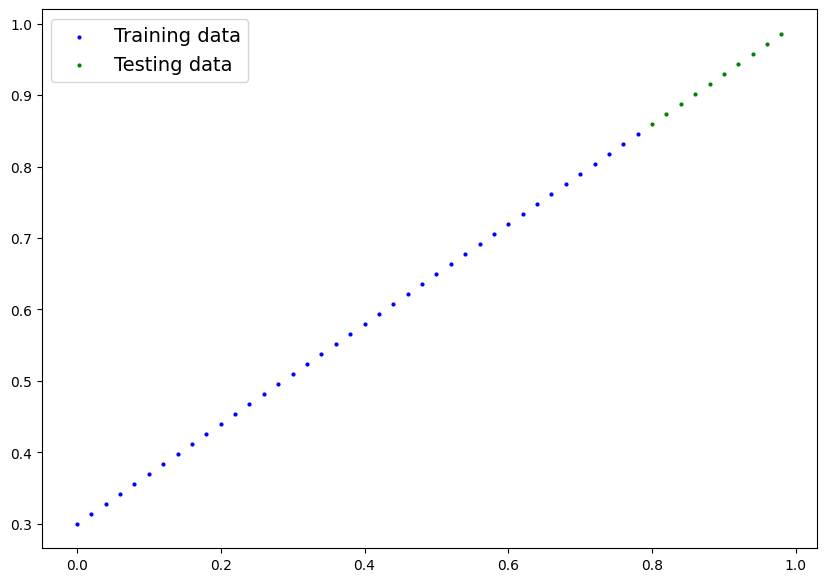

In [ ]:
plot_predictions()

In [ ]:
#Lets save whole model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
!ls -l models

total 3
-rw-r--r-- 1 root users 1063 Jul 27 05:26 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root users 1127 Aug  4 15:46 model_1.pth


In [ ]:
#loading model

loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.eval()

loaded_model.state_dict()

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6993]])),
             ('linear_layer.bias', tensor([0.2996]))])

# Exercises

In [ ]:
bias = 0.9
weight = 0.3


# there must be 100 points between 0 and 1
start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X_split = int(0.8 * len(X))
X_train, Y_train = X[:X_split], Y[:X_split]
X_test, Y_test = X[X_split:], Y[X_split:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape



(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [ ]:
#ploting the data

def plot_predictions(
    train_data=X_train,
    train_labels=Y_train,

    test_data=X_test,
    test_labels=Y_test,

    predictions=None
):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

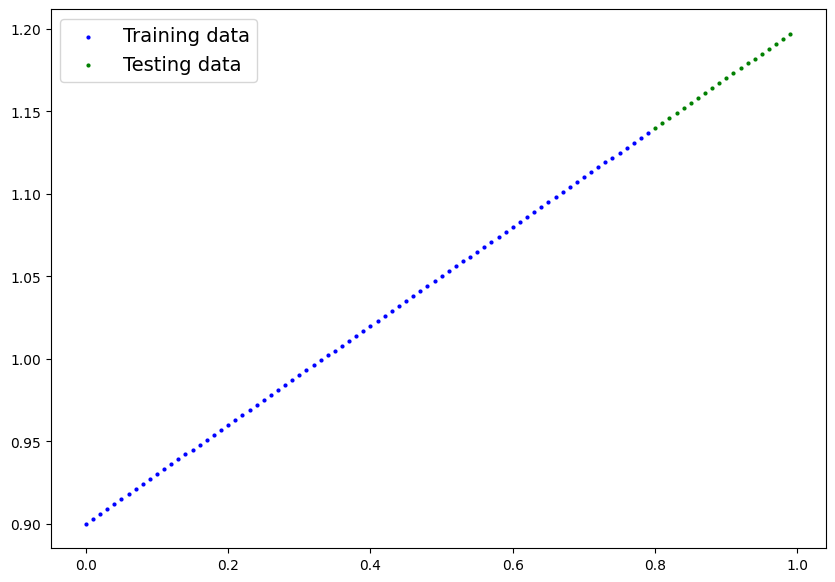

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()\
        
        #lets add parameters here
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [ ]:
exercise_model = LinearRegressionModel()

exercise_model.state_dict()

OrderedDict([('bias', tensor([-0.1489])), ('weight', tensor([0.2114]))])

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=exercise_model.parameters(), lr=0.01)

In [ ]:
epoches = 300
test_pred = []

train_loss_values = []
results = []

for epoch in range(epoches):
    exercise_model.train()
    y_pred = exercise_model(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss_values.append(loss)
    exercise_model.eval()
    with torch.inference_mode():
        test_pred = exercise_model(X_test)
        test_loss = loss_fn(test_pred, Y_test)
    results.append(test_loss)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 1.0839414596557617 | Test loss: 1.1147081851959229
Epoch: 10 | Loss: 0.9683389663696289 | Test loss: 0.97935551404953
Epoch: 20 | Loss: 0.8527365922927856 | Test loss: 0.8440030217170715
Epoch: 30 | Loss: 0.7371340990066528 | Test loss: 0.708650529384613
Epoch: 40 | Loss: 0.6215314865112305 | Test loss: 0.5732980370521545
Epoch: 50 | Loss: 0.5059291124343872 | Test loss: 0.4379456639289856
Epoch: 60 | Loss: 0.39032667875289917 | Test loss: 0.3025932312011719
Epoch: 70 | Loss: 0.2747242748737335 | Test loss: 0.16724081337451935
Epoch: 80 | Loss: 0.15912190079689026 | Test loss: 0.03188841789960861
Epoch: 90 | Loss: 0.06739052385091782 | Test loss: 0.07913749665021896
Epoch: 100 | Loss: 0.053576767444610596 | Test loss: 0.10764060169458389
Epoch: 110 | Loss: 0.049280621111392975 | Test loss: 0.11045757681131363
Epoch: 120 | Loss: 0.04578030854463577 | Test loss: 0.10523317009210587
Epoch: 130 | Loss: 0.04235329106450081 | Test loss: 0.09758556634187698
Epoch: 140 | Loss:

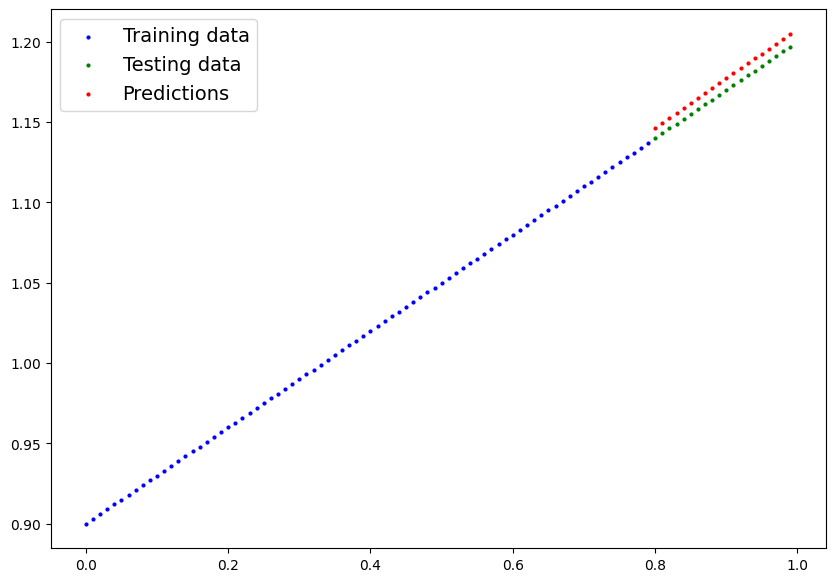

In [ ]:
plot_predictions(predictions=test_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ebfa92-bc91-4519-9c1f-1a283eb6c9d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>